# 从数据中提取重要信息——特征值与矩阵分解

## 1. 特征值与特征向量

```问题```

假设有方阵和向量如下：$A = \begin{bmatrix}4&2\\1&5\\\end{bmatrix}$ $B = \begin{bmatrix}2\\1\\\end{bmatrix}$ $C = \begin{bmatrix}1\\1\\\end{bmatrix}$ $D = \begin{bmatrix}-2\\1\\\end{bmatrix}$，计算并观察$A\times B,A\times C,A\times D$的结果。

In [1]:
import numpy as np

A = np.array([[4,2],[1,5]])
A

array([[4, 2],
       [1, 5]])

In [2]:
B = np.array([[2],[1]])
C = np.array([[1],[1]])
D = np.array([[-2],[1]])

In [7]:
A.dot(B)

array([[10],
       [ 7]])

In [8]:
A.dot(C)

array([[6],
       [6]])

In [9]:
A.dot(D)

array([[-6],
       [ 3]])

* 矩阵与向量相乘是对向量进行线性变换，也就是对原始向量同时施加方向和长度的变化。绝大部分向量（比如B）会被矩阵变换得“面目全非”，但是存在一些特殊的向量（比如C、D）,被矩阵变换后，**仅有长度的变化，方向仍然保持不变。数学上表示为 $Ax=\lambda x$,其中x为向量，$\lambda$为长度的变化比例，称$\lambda$为特征值，$x$为特征向量。**

#### 特征值和特征向量的求解

NumPy中调用np.linalg.eig()方法，输入方阵A，返回A的特征值和特征向量。

In [11]:
A = np.array([[4,2],[1,5]])

eig_val, eig_vex = np.linalg.eig(A)
print(f"原始矩阵为：\n{A}")
print(f"A的特征值为：\n{eig_val}")
print(f"A的特征向量为：\n{eig_vex}")

原始矩阵为：
[[4 2]
 [1 5]]
A的特征值为：
[3. 6.]
A的特征向量为：
[[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]


* 验证 $Ax=\lambda x$

In [13]:
C1 = A.dot(eig_vex)
C2 = eig_val * eig_vex
print("Ax = \n",C1)
print("lambda*x= \n",C2)


Ax = 
 [[-2.68328157 -4.24264069]
 [ 1.34164079 -4.24264069]]
lambda*x= 
 [[-2.68328157 -4.24264069]
 [ 1.34164079 -4.24264069]]


## 2. 特征值分解  

特征值分解是矩阵分解的一种方法，矩阵分解**将原始矩阵表示成新的结构简单或者具有特殊性质的两个或者多个矩阵的乘积，类似于代数中的因子分解。** 矩阵分解主要用于降维、主成分分析等。

**特征值分解是将矩阵分解为 $A = Q\sum Q^{-1}$的形式**  
* A必须是方阵且可以对角化。  
* Q是A的特征向量组成的矩阵，$\sum$是对角阵，主对角线上的元素代表A的特征值。特征向量矩阵Q的第i个列向量与$\sum$的第i行对角线上的特征值对应  

验证如下：

In [14]:
A = np.array([[4,2],[1,5]])
eig_val, eig_vex = np.linalg.eig(A)

Q = eig_vex
Q_inv = np.linalg.inv(Q)
sigma = np.diag(eig_val)

print(f"原始矩阵为：\n{A}")
print(f"特征向量矩阵Q：\n{Q}")
print(f"特征值矩阵 Sigma：\n{sigma}")
print(f"特征向量矩阵 Q 的逆矩阵：\n{Q_inv}")
print(Q.dot(sigma.dot(Q_inv)))

原始矩阵为：
[[4 2]
 [1 5]]
特征向量矩阵Q：
[[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]
特征值矩阵 Sigma：
[[3. 0.]
 [0. 6.]]
特征向量矩阵 Q 的逆矩阵：
[[-0.74535599  0.74535599]
 [-0.47140452 -0.94280904]]
[[4. 2.]
 [1. 5.]]


## 3. 奇异值分解（SVD分解）

特征值分解的局限性很多，比如它只适合方阵。但实际应用里，绝大多数矩阵都不会是方阵。

```定义```

SVD分解：  
可将任意矩阵A分解为: $A_{m \times n} = U_{m \times m} S _{m \times n} V^T_{n \times n}$，
其中，U和V是正交矩阵，满足 $U^TU = E_{m \times m}$,  $V^TV = E_{n \times n}$  

* U为左奇异矩阵，m行m列，列由$AA^T$的特征向量组成，且特征向量为单位向量；  
* $S$矩阵，m行n列，对角元素来源于$AA^T$或者$A^TA$的特征值，并且按照降序排列，值越大，可理解为信息越重要；  
* V为右奇异矩阵，n行n列,列由$A^TA$的特征向量组成，且特征向量为单位向量；

### 3.1 奇异值分解的实现  

SVD分解可直接使用 np.linalg.svd() 方法，输入待分解矩阵，返回 u, s, v 三个值，分别表示U矩阵，奇异值矩阵和V的转置矩阵。

In [30]:
A = np.array([[1,5,7,6,1],[2,1,10,4,4],[3,6,7,5,2]])
A

array([[ 1,  5,  7,  6,  1],
       [ 2,  1, 10,  4,  4],
       [ 3,  6,  7,  5,  2]])

In [31]:
U,S,VT = np.linalg.svd(A)
sigma = np.zeros(A.shape)
sigma[:S.shape[0],:S.shape[0]] = np.diag(S)
sigma

array([[18.53581747,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  5.0056557 ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.83490648,  0.        ,  0.        ]])

### 3.2 利用奇异值分解重构矩阵 

原始矩阵可以根据U、S、VT的乘积重构。

In [25]:
print(f'原始矩阵为：\n{A}')

原始矩阵为：
[[ 1  5  7  6  1]
 [ 2  1 10  4  4]
 [ 3  6  7  5  2]]


In [26]:
print(f'SVD分解后的重构矩阵为：\n{U.dot(sigma.dot(VT))}')

SVD分解后的重构矩阵为：
[[ 1.  5.  7.  6.  1.]
 [ 2.  1. 10.  4.  4.]
 [ 3.  6.  7.  5.  2.]]


### 3.3 利用奇异值分解进行矩阵近似

从特征值矩阵S中可以看到特征值的前两项比较大，最后一项值小。特征值越大，说明包含原始矩阵的信息量越多。在特征值分解后，保留比较大的特征值及其对应的特征向量，舍弃比较小的特征值及其特征向量，就可以达到压缩矩阵的目的。

通过取不同的k值，分别对应取U的前k列，S变成k阶方阵，VT取前k行，利用矩阵乘积得到近似矩阵。

In [32]:
print(f"原始矩阵为：\n{A}")
for k in (3,2,1):
    D = U[:,:k].dot(sigma[:k,:k].dot(VT[:k,:]))
    print(f"k={k},压缩后的矩阵为：\n{D}")

原始矩阵为：
[[ 1  5  7  6  1]
 [ 2  1 10  4  4]
 [ 3  6  7  5  2]]
k=3,压缩后的矩阵为：
[[ 1.  5.  7.  6.  1.]
 [ 2.  1. 10.  4.  4.]
 [ 3.  6.  7.  5.  2.]]
k=2,压缩后的矩阵为：
[[ 1.97689227  5.36478923  6.83675076  5.3474913   1.48343826]
 [ 1.99460216  0.99798435 10.00090204  4.00360545  3.99732875]
 [ 2.07406947  5.6542408   7.15473299  5.61846914  1.54178136]]
k=1,压缩后的矩阵为：
[[1.93945441 3.81704481 7.72367565 4.79032235 2.27445031]
 [2.0689565  4.07191816 8.23940424 5.11018381 2.42632088]
 [2.03413763 4.00339106 8.1007417  5.02418354 2.38548786]]


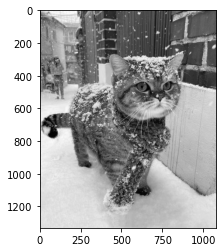

In [33]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

A = np.array(Image.open(r'data\\cat.jpg').convert("L"))
plt.imshow(A,cmap='gray')

In [35]:
A.shape

(1331, 1080)

In [38]:
U,S,VT = np.linalg.svd(A)
print(S,S.shape)

[1.82192798e+05 2.47649789e+04 2.15645649e+04 ... 6.64989235e+00
 6.36842396e+00 6.12910642e+00] (1080,)


In [40]:
sigma = np.zeros(A.shape)
sigma[:S.shape[0],:S.shape[0]] = np.diag(S)
sigma

array([[182192.79797971,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,  24764.97887836,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,  21564.56491092, ...,
             0.        ,      0.        ,      0.        ],
       ...,
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ]])

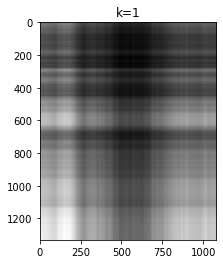

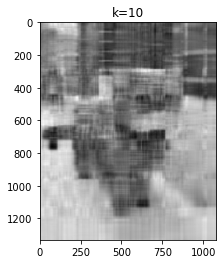

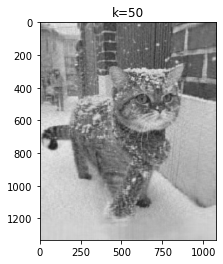

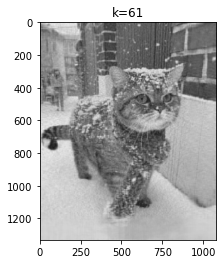

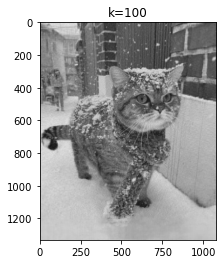

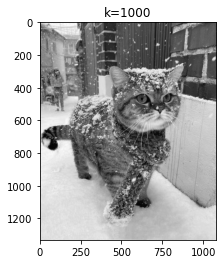

In [45]:
for k in (1,10,50,61,100,1000):
    D = U[:,:k].dot(sigma[:k,:k].dot(VT[:k,:]))
    pic = plt.imshow(D, cmap='gray')
    plt.title(f"k={k}")
    plt.show()

In [46]:
# 选择合适的k值  

total = np.sum(S**2)
ptg = 0.99
for k in range(S.shape[0]):
    current = np.sum(S[:k] ** 2)
    if current >= total * ptg:
        break
print(k, current, total)

61 36026128216.74529 36387165056.00023


旋转——拉伸——旋转
主成分分析方法：去中心化